C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,latitude,longitude,price
471,40.70283,-73.92131,60
534,40.65513,-73.95641,43
553,40.75895,-73.98830,150
1103,40.67747,-73.76493,39
1125,40.82537,-73.94392,85
...,...,...,...
47579,40.64567,-73.89091,45
47585,40.74942,-73.98170,95
47708,40.69298,-73.86396,50
47967,40.76384,-73.98248,125


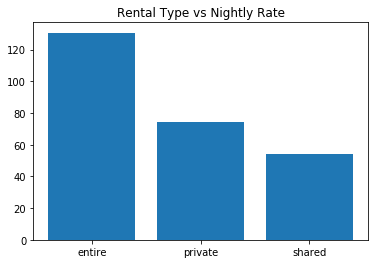

In [173]:
# megha smells
import matplotlib.pyplot as plt
import pandas
import folium
import numpy as np
from sklearn import linear_model

data = pandas.read_csv("AB_NYC_2019.csv")
data = data[data["price"]>20]
data = data[data["price"]<200]
data = data.dropna()
data.columns

# visualizations 
# N
# 1. Heatmap based on prices  
# 2. Heatmap based on availability

# R
# 3. Room_type vs Price 
# 4. Relationship bewteen rating and price

# M
# 5. Heatmap based on rating
# 6. Room_type vs availability



# # Machine Learning:
# 1. Based on other info -> Suggested Price

# # Visulizations:



# 3. Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row["price"]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row["price"]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row["price"]
        tally["shared"]+=1

data_by_roomtype.apply(generate_bar_plot, axis=1)

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")

from folium import plugins

map_hooray = folium.Map(location=[40.7, -73.9],
                    zoom_start = 10) 

df_acc = data 
# Ensure you're handing it floats
df_acc['latitude'] = df_acc['latitude'].astype(float)
df_acc['longitude'] = df_acc['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['reviews_per_month']>5] # Reducing data size so it runs faster# Reducing data size so it runs faster
heat_df = heat_df[['latitude', 'longitude', 'price']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'price'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df["price"]>20*i][heat_df["price"]<20*(i+1)].iterrows()] for i in range(0, 50)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.7)
hm.add_to(map_hooray)
# Display the map
map_hooray

heat_df



In [174]:
data.sort_values(["price"])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
27791,21798411,Full mattress in the living room,47735494,Iris,Queens,Rego Park,40.72826,-73.87015,Shared room,21,1,11,2018-04-21,0.55,4,0
20190,16161819,Cozy Room in a 2BR Apartment,83732495,Debbie,Brooklyn,East Flatbush,40.65221,-73.93634,Private room,21,5,4,2017-04-30,0.15,1,0
31178,24207804,"NYC room-cozy, basic, clean, cheap & close to all",182488531,Kevin4,Queens,Elmhurst,40.73739,-73.86991,Shared room,21,1,21,2019-06-16,1.64,2,260
33757,26753081,Trendy Nabe Bunk for travelers,201015598,Anchor,Brooklyn,Bedford-Stuyvesant,40.69124,-73.93911,Shared room,21,1,35,2019-06-20,2.92,17,78
42519,33002617,Room for 2 Per diem $50 rental up to 30 days max,248385708,Alexander,Brooklyn,Sheepshead Bay,40.60331,-73.95082,Private room,21,1,2,2019-05-26,1.02,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,666613,Amazing Williamsburg entire Loft. Floor 2B,3370705,Valentin,Brooklyn,Williamsburg,40.71112,-73.96338,Entire home/apt,199,4,78,2019-06-07,1.26,1,65
1510,683084,Midtown West- A COZY ONE bedroom.,3480879,Danny,Manhattan,Chelsea,40.75286,-74.00162,Entire home/apt,199,6,40,2017-10-15,0.50,1,0
31566,24583029,"Cosy,Elegant 1 Bedroom Apartment in heart of UES!",75302217,C-Van,Manhattan,Upper East Side,40.77883,-73.95528,Entire home/apt,199,3,10,2019-06-15,0.70,2,365
1382,611009,HUGE East Village 2 Bd w/Priv Yard,3029414,Deborah,Manhattan,East Village,40.72560,-73.97857,Entire home/apt,199,3,243,2019-06-24,2.95,1,142


# Megha smells really bad

In [175]:
# Means, Medians, and Standard Deviations

# Price

print("---------------Price-------------")
print("Mean: " + str(np.mean(data["price"])))
print("Median: " + str(np.median(data["price"])))
print("Standard Deviation: " + str(np.std(data["price"])))
print()
print("---------------Number of Reviews per Month-------------")
print("Mean: " + str(np.mean(data["reviews_per_month"])))
print("Median: " + str(np.median(data["reviews_per_month"])))
print("Standard Deviation: " + str(np.std(data["reviews_per_month"])))
print()
print("---------------Number of Reviews-------------")
print("Mean: " + str(np.mean(data["number_of_reviews"])))
print("Median: " + str(np.median(data["number_of_reviews"])))
print("Standard Deviation: " + str(np.std(data["number_of_reviews"])))

# Reviews per Month

---------------Price-------------
Mean: 98.50935753312818
Median: 90.0
Standard Deviation: 44.0904146576301

---------------Number of Reviews per Month-------------
Mean: 1.3969007096652837
Median: 0.72
Standard Deviation: 1.723401870731291

---------------Number of Reviews-------------
Mean: 30.673428374050115
Median: 10.0
Standard Deviation: 50.03764696349227


In [176]:
neighbourhood_averages = {}

for row in data.iterrows():
#     print(row[1][5])
    if row[1][5] in neighbourhood_averages:
        neighbourhood_averages[row[1][5]][0]+=1
        neighbourhood_averages[row[1][5]][1]+=row[1][9]
    else:
        neighbourhood_averages[row[1][5]] = [1, row[1][9]]
        

# def neighbourhood_calculator(n):
#     global neighbourhood_averages
#     if n in neighbourhood_averages:
#         neighbourhood_averages[n][0]+=1
#         neighbourhood_averages[n][1]+=
        



In [177]:
manhattan_mean = data[data["neighbourhood_group"]=="Manhattan"].price.mean()
brooklyn_mean = data[data["neighbourhood_group"]=="Brooklyn"].price.mean()
queens_mean = data[data["neighbourhood_group"]=="Queens"].price.mean()
staten_mean = data[data["neighbourhood_group"]=="Staten Island"].price.mean()
bronx_mean = data[data["neighbourhood_group"]=="Bronx"].price.mean()


In [178]:
def replace_neighbourhood(n):
    if(n == "Manhattan"): 
        return manhattan_mean
    elif(n == "Brooklyn"): 
        return brooklyn_mean
    elif(n == "Queens"): 
        return queens_mean
    elif(n == "Staten Island"): 
        return staten_mean
    elif(n == "Bronx"): 
        return bronx_mean
    
def replace_type(t):
    if(t == "Entire home/apt"):
        return averages["entire"]
    elif(t == "Private room"):
        return averages["private"]
    elif(t == "Shared room"):
        return averages["shared"]
    print(t)
    

data.neighbourhood_group = data["neighbourhood_group"].apply(replace_neighbourhood)
data.room_type = data["room_type"].apply(replace_type)

In [179]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [180]:
pre = data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude',
       'minimum_nights', 'last_review' , 'calculated_host_listings_count',
       'availability_365'], axis=1)

In [181]:
pre

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,reviews_per_month
0,92.812509,Kensington,74.464919,149,9,0.21
3,92.812509,Clinton Hill,130.677760,89,270,4.64
4,114.583992,East Harlem,130.677760,80,9,0.10
6,92.812509,Bedford-Stuyvesant,74.464919,60,49,0.40
7,114.583992,Hell's Kitchen,74.464919,79,430,3.47
...,...,...,...,...,...,...
48732,114.583992,Lower East Side,130.677760,150,1,1.00
48782,114.583992,Upper East Side,74.464919,129,1,1.00
48790,79.334977,Flushing,74.464919,45,1,1.00
48805,70.606930,Mott Haven,130.677760,100,2,2.00


In [182]:
neighbourhood_averages2 = {}
for k in neighbourhood_averages:
    neighbourhood_averages2[k] = neighbourhood_averages[k][1]/neighbourhood_averages[k][0]


In [183]:
neighbourhood_averages2

{'Kensington': 70.953125,
 'Clinton Hill': 108.66149870801034,
 'East Harlem': 98.82472989195678,
 'Bedford-Stuyvesant': 87.62024013722127,
 "Hell's Kitchen": 126.32791586998088,
 'Upper West Side': 119.55740740740741,
 'Chinatown': 117.16141732283465,
 'South Slope': 119.75369458128078,
 'West Village': 148.375,
 'Williamsburg': 102.05986608901142,
 'Chelsea': 131.4362850971922,
 'Crown Heights': 88.49604221635884,
 'Park Slope': 122.140522875817,
 'Windsor Terrace': 106.38532110091744,
 'Inwood': 78.54871794871795,
 'East Village': 124.35159817351598,
 'Harlem': 92.19119878603945,
 'Greenpoint': 109.33422459893048,
 'Bushwick': 74.53846153846153,
 'Lower East Side': 116.68190127970749,
 'Fort Greene': 116.6439628482972,
 'Prospect-Lefferts Gardens': 87.26794258373205,
 'Long Island City': 94.51226158038148,
 'SoHo': 130.91836734693877,
 'Washington Heights': 76.4978229317852,
 'Woodside': 75.96894409937889,
 'Flatbush': 78.1522198731501,
 'Prospect Heights': 109.42687747035573,
 'Car

In [184]:
def neighbourhood_change(n):
    global neighbourhood_averages2
    return neighbourhood_averages2[n]

pre.neighbourhood = pre["neighbourhood"].apply(neighbourhood_change)

In [191]:
reg = linear_model.LinearRegression()
reg.fit(pre[['neighbourhood_group', 'neighbourhood', 'room_type', 'reviews_per_month']], data.price)

a = reg.coef_
i = reg.intercept_



In [192]:
i

-75.95809671367188

In [193]:
88.12*a[1] + 81.574*a[2] + 0.21*a[3] + i

60.27133700544472

In [194]:
pre

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,reviews_per_month
0,92.812509,70.953125,74.464919,149,9,0.21
3,92.812509,108.661499,130.677760,89,270,4.64
4,114.583992,98.824730,130.677760,80,9,0.10
6,92.812509,87.620240,74.464919,60,49,0.40
7,114.583992,126.327916,74.464919,79,430,3.47
...,...,...,...,...,...,...
48732,114.583992,116.681901,130.677760,150,1,1.00
48782,114.583992,124.172161,74.464919,129,1,1.00
48790,79.334977,73.252907,74.464919,45,1,1.00
48805,70.606930,80.716981,130.677760,100,2,2.00
